In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pickle



In [2]:
train= pd.read_parquet('D:/ashutosh_adaptready/featured_train.parquet')
test= pd.read_parquet('D:/ashutosh_adaptready/featured_test.parquet')

In [5]:


# Assuming train is your DataFrame
X = train[['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'hour', 'dayofweek', 'month', 'year']]
y = train['OT']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [7]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 1.038060920977652
Mean Squared Error: 2.471934376715907
R-squared: 0.9657654031985985


A lower MAE indicates better prediction accuracy. Since this value is close to 1, your model is doing well, but there is still room for minor improvements.

A smaller MSE indicates better accuracy. This value is reasonable, but reducing it further would indicate fewer large prediction errors.

A higher R² indicates that the model fits the data well, and since 0.966 is very close to 1, your model is performing well overall.



In [10]:


# Assuming you have a datetime column in your original DataFrame
last_date = train['date'].max()  # Or any specific date you want to start from

# Create future time steps starting from the last_date
future_steps = pd.date_range(start=last_date + pd.DateOffset(hours=1), periods=24, freq='H')

# Example future_data (based on the last available data)
future_data = X_test.iloc[-1].copy()

# Predict future values
future_predictions = []
for step in future_steps:
    # Update future_data with new time step information
    future_data['hour'] = step.hour
    future_data['dayofweek'] = step.dayofweek
    future_data['month'] = step.month
    future_data['year'] = step.year
    
    # Make prediction
    pred = model.predict([future_data])
    future_predictions.append(pred[0])


C:\Users\anand\AppData\Local\Temp\ipykernel_31644\2975410925.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_steps = pd.date_range(start=last_date + pd.DateOffset(hours=1), periods=24, freq='H')
c:\Users\anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:

In [11]:
# Convert future_predictions to a DataFrame for better visualization
future_predictions_df = pd.DataFrame({
    'date': future_steps,
    'predicted_OT': future_predictions
})

print(future_predictions_df)


                  date  predicted_OT
0  2018-06-27 00:45:00      10.59716
1  2018-06-27 01:45:00      10.59716
2  2018-06-27 02:45:00      10.59716
3  2018-06-27 03:45:00      10.59294
4  2018-06-27 04:45:00      10.64148
5  2018-06-27 05:45:00      10.64148
6  2018-06-27 06:45:00      10.62108
7  2018-06-27 07:45:00      10.68017
8  2018-06-27 08:45:00      10.70620
9  2018-06-27 09:45:00      10.67807
10 2018-06-27 10:45:00      10.63233
11 2018-06-27 11:45:00      10.69284
12 2018-06-27 12:45:00      10.68088
13 2018-06-27 13:45:00      10.68088
14 2018-06-27 14:45:00      10.75193
15 2018-06-27 15:45:00      10.80470
16 2018-06-27 16:45:00      10.97635
17 2018-06-27 17:45:00      10.65485
18 2018-06-27 18:45:00      10.81874
19 2018-06-27 19:45:00      10.81732
20 2018-06-27 20:45:00      10.78074
21 2018-06-27 21:45:00      10.76597
22 2018-06-27 22:45:00      10.68155
23 2018-06-27 23:45:00      10.73712


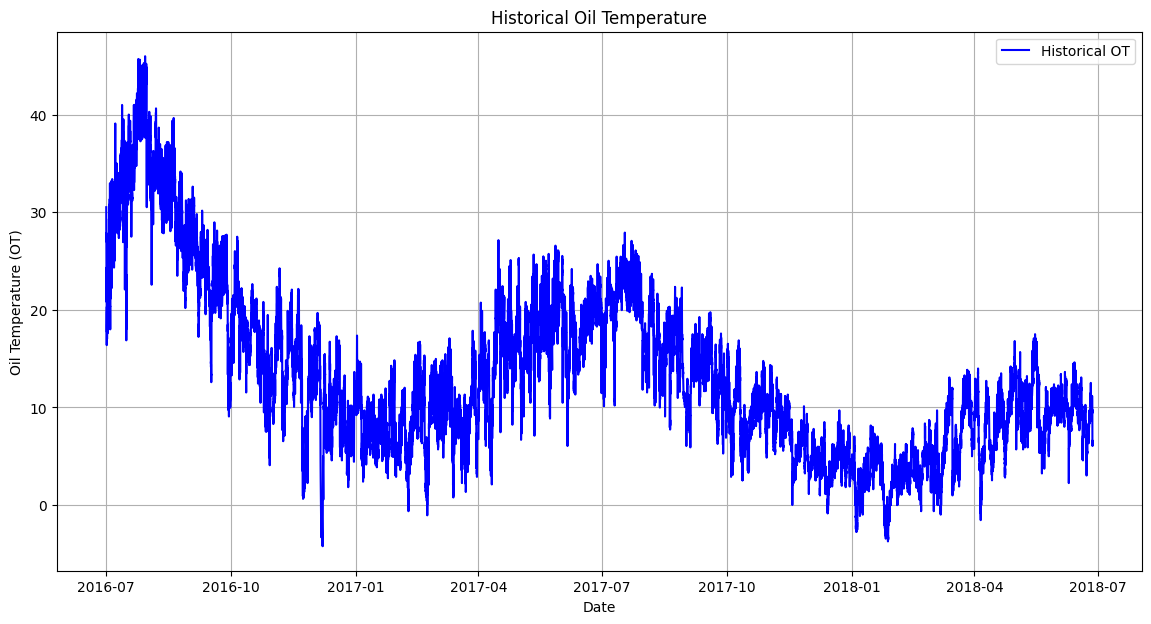

In [12]:
# Plot historical data
plt.figure(figsize=(14, 7))
plt.plot(train['date'], train['OT'], color='blue', label='Historical OT')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.title('Historical Oil Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Plot future predictions
plt.figure(figsize=(14, 7))
plt.plot(future_steps, future_predictions, color='orange', linestyle='--', label='Forecasted OT')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.title('Future Oil Temperature Predictions')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
print(future_predictions_df.columns)
print(train.columns)


Index(['date', 'predicted_OT'], dtype='object')
Index(['date', 'hour', 'dayofweek', 'month', 'year', 'OT', 'HUFL', 'HULL',
       'MUFL', 'MULL', 'LUFL', 'LULL'],
      dtype='object')


creating .pkl file for the model so no need to run everytime 

In [15]:

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)




loading the pkl model 

In [16]:

with open('random_forest_model.pkl', 'rb') as file:
    loaded_rf_model = pickle.load(file)




In [17]:

predictions = loaded_rf_model.predict(X_test)

# Print or evaluate predictions
print(predictions)


[-0.65097001  5.27600002 32.01915941 ...  4.88128008  5.68474998
  6.93126006]
